**Python (Semester 2 2024)**
# 6 Statistical Packages

*N. Hernitschek*

This notebook contains examples on how to work with statistical packages in Python as part of **Python (Semester 2 2024)**. 

---
## Contents
* [Python Review](#first-bullet)
* [Curve Fitting with SciPy](#second-bullet)
* [Linear Regression](#third-bullet)
* [Exercise](#fourth-bullet)
* [Summary](#fifth-bullet)


## 1. Python Review <a class="anchor" id="first-bullet"></a>

Before we continue with specific coding exercises, please review the code examples we saw in the lecture and try some of your own.

Reviewing code examples should include:
* running the code
* modifying the code to get a general understanding
* trying to understand possible limitations of the code

This will help you to get a better understanding of the Python syntax as well as of specific libraries.

## 2. Curve fitting with SciPy <a class="anchor" id="second-bullet"></a>

SciPy provides `curve_fit`, a simple and useful implementation of the Levenburg-Marquardt non-linear minimization algorithm. In the following example we generate a fake dataset which we then fit with a Gaussian, returning the covariance matrix for parameter uncertainties.

Scale =  12.181 +/- 0.889
Offset = 3.102 +/- 0.054
Sigma =  1.583 +/- 0.105


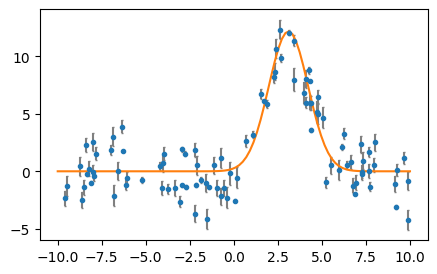

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Create a fit function
def gaussian(x, a, b, c):
    val = a * np.exp(-(x - b)**2 / c**2)
    return val

# Generate fake data.
n = 100
x = np.random.uniform(-10.0, 10.0, n)
y = np.exp(-(x - 3.)**2 / 4) * 10. + np.random.normal(0., 2., n)
e = np.random.uniform(0.1, 1., n)


# Fit with the fit function
popt, pcov = curve_fit(gaussian, x, y, sigma=e)

# Print results
print("Scale =  %.3f +/- %.3f" % (popt[0], np.sqrt(pcov[0, 0])))
print("Offset = %.3f +/- %.3f" % (popt[1], np.sqrt(pcov[1, 1])))
print("Sigma =  %.3f +/- %.3f" % (popt[2], np.sqrt(pcov[2, 2])))

# Plot data
fig=plt.errorbar(x, y, yerr=e, fmt='.',ms=6,ecolor='grey',capsize=1, capthick=1)

# Plot model
xm = np.linspace(-10., 10., 100)  # 100 evenly spaced points
plt.plot(xm, gaussian(xm, popt[0], popt[1], popt[2]))

# Show figure
plt.show()

## 3. Linear Regression <a class="anchor" id="second-bullet"></a>



In the following, we will see how to **fit polynomial functions to data**.


When looking at the results of experiments, it is critically important to be able to fit curves to scattered data points. We will demonstrate that doing so in Python is relatively simple, but the theory behind how it works is a bit more involved. 


There are different ways of fitting curves to scattered points. One of the most frequently used is known as Linear Least Squares (LLS), a subset of Bayesian generalized fitting. Note, we can fit any order polynomial, not just straight lines, using this method. The “linear” part refers to how the distance between the data point and the line is measured, as we describe momentarily. The method of LLS fits a line to your data that minimizes the squared distances between all the points and the line. The reason for choosing the squared distances is that some points will lie below your line, but distances are positive. By squaring we allow for points below the line to also be a “positive” distance away from the line. The formula for generating a LLS fit outputs the constants of the equation $a_0+a_1x+a_2x2+...$ for as many orders as you require based on the degree/order of your fit. For the linear case, then, LLS outputs a slope and a y-intercept. The formula requires linear algebra, which some of you may not yet have taken, and looks like this:



$$\begin{bmatrix}
N & \sum x_i & \sum x_i^2 & ... & \sum x_i^m \\
\sum x_i & \sum x_i^2 & \sum x_i^3 & ...&\sum x_i^{(m+1)}\\
...& ...& ...& ...& ...&\\
\sum x_i^m & \sum x_i^{(m+1)} & \sum x_i^{(m+2)} & ... & \sum x_i^{(2m)} \\
\end{bmatrix} 
\begin{bmatrix}
c_1  \\
c_2 \\
c_3 \\
...\\
c_n
\end{bmatrix}
=
\begin{bmatrix}
\sum y_i  \\
\sum x_i y_i \\
...
\sum x^{(n-1)}y_i
\end{bmatrix}
$$


Despite this looks complicated, it is not hard to implement. $N$ is the number of data points you are trying to fit to. To enter the $x$ sums, simply take your $x$ array (such as an array of centroids), and run `np.sum` on them (squared, cubed, etc as required). The $y_i$ are the $y$ values of the data points, which can be multiplied by the $x$ arrays within the `np.sum` function.

## Fitting a Straight Line to Data

The equation above shows us how to fit any order polynomial to a set of data (based on how large you make the array). We are going to practice simply fitting an order 1 polynomial (a straight line) to some data. In this case, the LLS formula simplifies to:


$$\begin{bmatrix}
N & \sum x_i  \\
\sum x_i & \sum x_i^2 \\
\end{bmatrix} 
\begin{bmatrix}
c_1  \\
c_2 \\
\end{bmatrix}
=
\begin{bmatrix}
\sum y_i  \\
\sum x_i y_i \\
\end{bmatrix}
$$


### Loading the Data

You should have downloaded a file called data.txt, which contains the data we are going to be fitting. You can load it into python using the np.loadtxt function. You'll want to end up with an array of $x$
values and an array of $y$ values. Once you've done that, you can use the given code to generate a plot to see what data we are fitting.


Text(0.5, 1.0, 'Data to Fit')

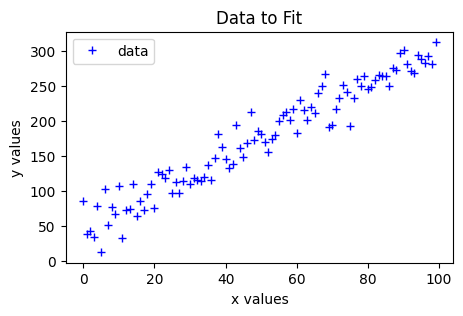

In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (5,3)
x,y = np.loadtxt('data.txt', unpack=True)


plt.plot(x,y,'b+',label='data')
plt.legend()
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Data to Fit')

We now define a function called `linear_fit` that implements the equations given above and returns two values: the slope $m$ and the $y$-intercept.


In [34]:
def linear_fit(x_data, y_data):
    #fill in code here
    N = len(x_data)
    array_1 = np.array([[N, np.sum(x_data)],[np.sum(x_data),np.sum(x_data**2)]])
    array_3 = np.array([[np.sum(y_data)],[np.sum(y_data*x_data)]])
    array_1_inv = np.linalg.inv(array_1)
    out_arr = np.dot(array_1_inv,array_3)
    intercept, slope = out_arr[0], out_arr[1]
    return slope, intercept

With his now we have the $y$-intercept and slope of our "best fit" to the data.

We continue with plotting the best fit line over our data:

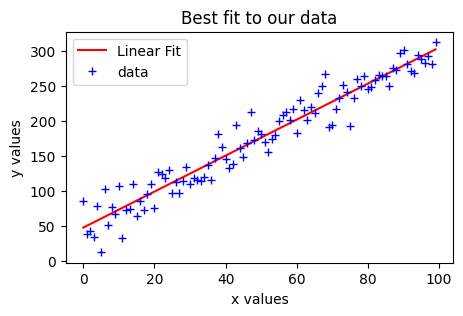

In [35]:
def plot_fit(x,y):
    slope, intercept = linear_fit(x,y)
    fit_line = slope*x + intercept
    plt.plot(x,fit_line,'r',label='Linear Fit')
    plt.plot(x,y,'b+',label='data')
    plt.legend()
    plt.xlabel('x values')
    plt.ylabel('y values')
    plt.title('Best fit to our data')
    plt.show()
    

plot_fit(x,y)



### Evaluating the Fit

So we have a fit to our data. But is it a good fit? Visually, it seems so, but we want quantitative measures.


To do so, we are going to evaluate the **residuals**, that is, the difference between the prediction of our fit and our data itself. Given that our data has no uncertainty (at least, none that has been specified), this is easy to calculate:

In [37]:
def return_residuals(x,y):
    slope, intercept = linear_fit(x,y)
    fit_line = slope*x + intercept
    residuals = y - fit_line
    return residuals, np.sum(residuals)

residuals, sum_residuals = return_residuals(x,y)
print (sum_residuals)



-8.476774837617995e-12


When we take a look at the sum of the residuals, we see that it has a very small number $\sim 10^{12}$.
This means that though the spread in residuals might be large, on average, the fit overpredicts and underpredicts the data in equal amounts, which is a sign of a good fit.

## Higher Order Polynomial Fits

We have now successfully fit a straight line (polynomial order 1) to our data. But what if the data were better described by a quadratic? It may look linear when we plot it, but it might be that the "section" of the data we have access to represents a small one, and we can't see the overall curvature well.

We can fit any order of polynomial to our data (being careful to avoid over-fitting - remember, a high enough order polynomial can fit any set of data with 0 residual, but will look pretty wacky).

For a higher-order polynomial fit, we now utilize functionality in the Numpy module. The above was more for illustrative purposes to show the underlying mechanism.


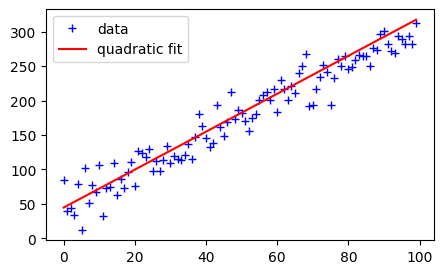

In [38]:
def quadratic_fit(x,y):
    fit_coefficients = np.polyfit(x,y,2)
    a0, a1, a2 = fit_coefficients[0], fit_coefficients[1], fit_coefficients[2]
    return a0, a1, a2
def plot_quadratic_fit(x,y):
    a0, a1, a2 = quadratic_fit(x,y)
    fit_line = x*a0**2 + x*a1 + a2
    plt.plot(x,y,'b+',label='data')
    plt.plot(x,fit_line,'r',label='quadratic fit')
    plt.legend()
    plt.show()
    
plot_quadratic_fit(x,y)

Visually interpreting this, a quadratic fit also could be a decent fit, though it doesn't look as good as the linear fit. In fact, if you print the coefficients out, you'll see that if this data is quadratic, the quadratic coefficient is very small; the remaining linear and constant coefficients are very similar to those in our linear fits. We take a look at the residuals:

In [40]:
def quadratic_residuals(x,y):
    a0,a1,a2 = quadratic_fit(x,y)
    fit_line = x*a0**2 + x*a1 + a2
    residuals = y - fit_line
    return residuals, np.sum(residuals)

q_residuals, q_residual_sum = quadratic_residuals(x,y)
print (q_residual_sum)


-589.4209680212704


The difference is obvious: The net sum of the residuals is way larger for the quadratic case. So it would appear that the linear fit is better here, e.g., the data most likely are linear in nature.


Indeed, the data are linear; the dataset was constructed by taking a perfectly straight line and adding Gaussian-distributed noise to make it look more like the type of data we might get from measurements.

Some notes on this:
* In reality, the situation where one order of fit is demonstrably and majorly better than another, rarely actually happens. In reality, we tend to simply try to use the lowest order fit that adequately describes our data.
* In many cases, we there are reasons to not use a polynomial fit but fitting other **templates**. E.g.: AGN light curves can be described very well by Gaussian processes, and supernovae and pulsating star light curves are often fit with specific template light curves. The reason is that we are often interested in different parameters than those from a polynom - we rather might be interested in e.g. periods, amplitudes.


## Summary <a class="anchor" id="fifth-bullet"></a>

In this lession, we have learnt how to use statistical packages in Python. This knowledge will be very valuable when analyzing data from large survey as it is typically the case in astronomy nowadays.